For all elliptical galaxies, what is the normalized velocity dispersion as a function of the normalized radius?

In [18]:
from astropy.table import QTable, Table, vstack

import numpy as np

import matplotlib.pyplot as plt

# Data

In [10]:
master_filename = '/Users/kellydouglass/Documents/Research/Rotation_curves/RotationCurves/spirals/DRPall-master_file.txt'

master_table = QTable.read(master_filename, format='ascii.ecsv')

### Keep only ellipticals

In [11]:
#imc_boolean = master_table['imc'] == 1
#aimc_boolean = master_table['aimc'] == 1
smooth_boolean = master_table['smoothness_score'] > 2.27

master_ellipticals = master_table[smooth_boolean]

# Plot all ellipticals

In [33]:
all_elliptical_data = Table(names=['r_deproj_arcsec_norm', 'vel_disp_norm'])

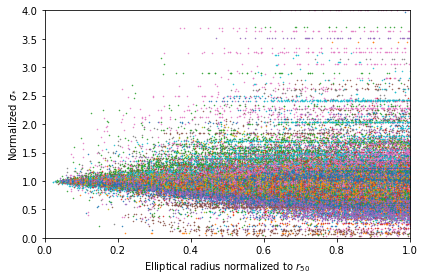

In [34]:
plt.figure()

for i in range(len(master_ellipticals)):
    
    gal_ID = str(master_ellipticals['MaNGA_plate'][i]) + '-' \
             + str(master_ellipticals['MaNGA_IFU'][i])
    
    data_filename = '../veldisp_data_files/' + gal_ID + '_veldisp.txt'
    data = Table.read(data_filename, format='ascii.commented_header')
    
    all_elliptical_data = vstack([all_elliptical_data, data], join_type='inner')
    
    plt.plot(data['r_deproj_arcsec_norm'], data['vel_disp_norm'], '.', markersize=1)
    
plt.xlabel('Elliptical radius normalized to $r_{50}$')
plt.ylabel('Normalized $\sigma_*$')

plt.xlim([0,1])
plt.ylim([0,4])

plt.tight_layout();

#plt.savefig('../figures/veldisp_r/ellipticals.png', format='png', dpi=300);

# Determine at what radius the dispersion is larger than some error value

In [51]:
max_variations = [0.01, 0.05, 0.1]

bin_width = 0.05
n_bins = int(1/bin_width)

max_radii = np.zeros(len(max_variations))

radii_bins = np.linspace(bin_width, 1, n_bins)

bin_indices = np.digitize(all_elliptical_data['r_deproj_arcsec_norm'], radii_bins)

medians = np.zeros(n_bins)
std_dev = np.zeros(n_bins)

for i in range(n_bins):
    bin_boolean = bin_indices == i
    
    vel_disp_bin_values = all_elliptical_data['vel_disp_norm'][bin_boolean]
    
    medians[i] = np.nanmedian(vel_disp_bin_values)
    std_dev[i] = np.nanstd(vel_disp_bin_values)

/Users/kellydouglass/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:748: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)
/Users/kellydouglass/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: UserWarning: Warning: converting a masked element to nan.


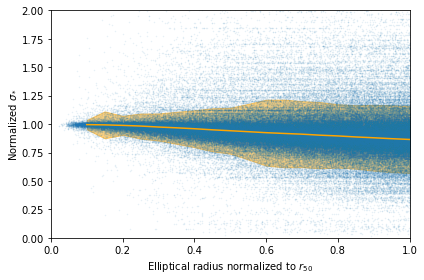

In [69]:
plt.figure()

plt.plot(all_elliptical_data['r_deproj_arcsec_norm'], 
         all_elliptical_data['vel_disp_norm'], 
         '.', markersize=1, alpha=0.1)
plt.plot(radii_bins, medians, 'orange')
plt.fill_between(radii_bins, medians - std_dev, medians + std_dev, alpha=0.5, color='orange')

plt.xlabel('Elliptical radius normalized to $r_{50}$')
plt.ylabel('Normalized $\sigma_*$')

plt.xlim([0,1])
plt.ylim([0,2])

plt.tight_layout();

plt.savefig('../figures/veldisp_r/ellipticals_median.png', format='png', dpi=300);

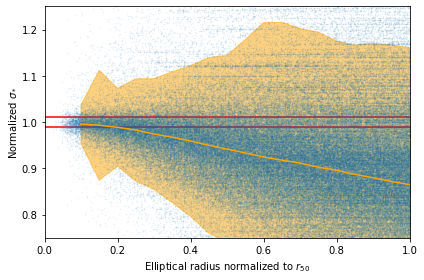

In [70]:
plt.figure()

plt.plot(all_elliptical_data['r_deproj_arcsec_norm'], 
         all_elliptical_data['vel_disp_norm'], 
         '.', markersize=1, alpha=0.1)
plt.plot(radii_bins, medians, 'orange')
plt.fill_between(radii_bins, medians - std_dev, medians + std_dev, alpha=0.5, color='orange')
plt.hlines([1.01, 0.99], 0, 1, colors='r')

plt.xlabel('Elliptical radius normalized to $r_{50}$')
plt.ylabel('Normalized $\sigma_*$')

plt.xlim([0,1])
plt.ylim([0.75,1.25])

plt.tight_layout();

plt.savefig('../figures/veldisp_r/ellipticals_median_0p01.png', format='png', dpi=300);

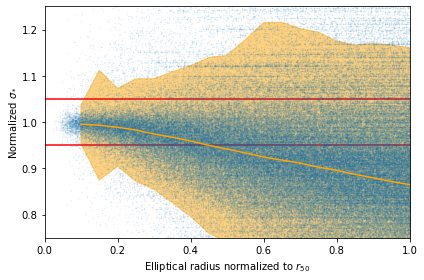

In [72]:
plt.figure()

plt.plot(all_elliptical_data['r_deproj_arcsec_norm'], 
         all_elliptical_data['vel_disp_norm'], 
         '.', markersize=1, alpha=0.1)
plt.plot(radii_bins, medians, 'orange')
plt.fill_between(radii_bins, medians - std_dev, medians + std_dev, alpha=0.5, color='orange')
plt.hlines([1.05, 0.95], 0, 1, colors='r')

plt.xlabel('Elliptical radius normalized to $r_{50}$')
plt.ylabel('Normalized $\sigma_*$')

plt.xlim([0,1])
plt.ylim([0.75,1.25])

plt.tight_layout();

plt.savefig('../figures/veldisp_r/ellipticals_median_0p05.png', format='png', dpi=300);

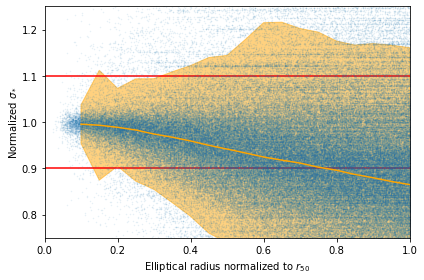

In [71]:
plt.figure()

plt.plot(all_elliptical_data['r_deproj_arcsec_norm'], 
         all_elliptical_data['vel_disp_norm'], 
         '.', markersize=1, alpha=0.1)
plt.plot(radii_bins, medians, 'orange')
plt.fill_between(radii_bins, medians - std_dev, medians + std_dev, alpha=0.5, color='orange')
plt.hlines([1.1, 0.9], 0, 1, colors='r')

plt.xlabel('Elliptical radius normalized to $r_{50}$')
plt.ylabel('Normalized $\sigma_*$')

plt.xlim([0,1])
plt.ylim([0.75,1.25])

plt.tight_layout();

plt.savefig('../figures/veldisp_r/ellipticals_median_0p1.png', format='png', dpi=300);